Data 불러오기


In [1]:
! yes | pip3 uninstall opencv-python
! yes | pip3 uninstall opencv-contrib-python
! yes | pip3 install opencv-python==3.4.2.16
! yes | pip3 install opencv-contrib-python==3.4.2.16


Uninstalling opencv-python-3.4.2.16:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-3.4.2.16.dist-info/*
Proceed (y/n)?   Successfully uninstalled opencv-python-3.4.2.16
Uninstalling opencv-contrib-python-3.4.2.16:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python-3.4.2.16.dist-info/*
Proceed (y/n)?   Successfully uninstalled opencv-contrib-python-3.4.2.16
  Using cached https://files.pythonhosted.org/packages/fa/7d/5042b668a8ed41d2a80b8c172f5efcd572e3c046c75ae029407e19b7fc68/opencv_python-3.4.2.16-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Using cached https://files.pythonhosted.org/packages/08/f1/66330f4042c4fb3b2d77a159db8e8916d9cdecc29bc8c1f56bc7f8a9bec9/opencv_contrib_python-3.4.2.16-cp36-cp36m-manylinux1_x86_64.whl


In [2]:
#구글마운트 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#kmc2 설치하기
!pip install kmc2
!pip install imgaug
#!pip3 install git+https://github.com/src-d/kmcuda.git#subdirectory=src
#CUDA_ARCH=61 pip install libKMCUDA

In [3]:
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import imutils 
import cv2 
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import copy
import pickle
from sklearn.cluster import KMeans
import imgaug.augmenters as iaa
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from PIL import Image #image 바꾸기
from sklearn.decomposition import PCA # PCA
from keras.preprocessing.image import ImageDataGenerator 
from PIL import Image
from sklearn.neighbors import BallTree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA

Using TensorFlow backend.


In [5]:
df_data=pd.read_csv('/content/drive/My Drive/2019-ml-finalproject/Label2Names.csv',header=None)
print(df_data)


       0              1
0      1          Faces
1      2     Faces_easy
2      3       Leopards
3      4     Motorbikes
4      5      accordion
..   ...            ...
96    97     wheelchair
97    98       wild_cat
98    99  windsor_chair
99   100         wrench
100  101       yin_yang

[101 rows x 2 columns]


In [41]:
DATA_ROOT_TRAIN="/content/drive/My Drive/2019-ml-finalproject/train"
train_des=list()
train_labels=list()

num_feature_dimensions=100 
pca = PCA(n_components = num_feature_dimensions)



for cls in tqdm(os.listdir(DATA_ROOT_TRAIN)): #진행도를 알려줌
  img_list = os.listdir(DATA_ROOT_TRAIN+'/'+cls)
  #print(DATA_ROOT_TRAIN+'/'+cls)
  #print(img_list)
  
  if cls == 'BACKGROUND_Google' :
    label= 102
  else :
    label=(df_data.index[df_data[1]==cls]+1).tolist()[0]


  '''
  이미지 잘들어있는지 확인
  if len(img_list) != 30:
   print(cls)
   print(len(img_list))
   '''
  
  if cls == 'BACKGROUND_Google' :
    continue
  for img in img_list:
    image=cv2.imread(DATA_ROOT_TRAIN+'/'+cls+'/'+img)
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    dst = gray.copy() 
    roi = gray[16:np.shape(gray)[0]-16, 16:np.shape(gray)[1]-16]
    #gray=cv2.resize(gray, dsize=(256, 256))
    train_des.append(roi)
    train_labels.append(label)
  


    '''
    image=Image.open(DATA_ROOT_TRAIN+'/'+cls+'/'+img)
    gray=image.convert("L") 
    for ang in range(0, 15, 20):
      img2 = gray.rotate(ang)
      data = np.asarray(img2)
      train_des.append(data)
      train_labels.append(label)
      # 반전하기
    if cls != 'stop_sign':
      img2 = gray.transpose(Image.FLIP_LEFT_RIGHT)
      data = np.asarray(img2)
      train_des.append(data)
      train_labels.append(label)

    '''




100%|██████████| 102/102 [00:11<00:00,  9.02it/s]


(65536,)
(3030, 65536)


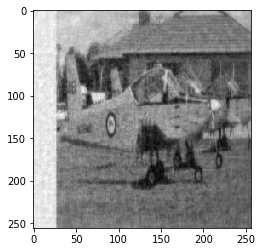

In [0]:
from sklearn.decomposition import PCA
pca=PCA(1500)

for i in range(len(train_des)):
  train_des[i]=np.ravel(train_des[i])
    
print(np.shape(train_des[4]))


gray=pca.fit_transform(train_des)
gray=pca.inverse_transform(gray)
print(np.shape(gray))
plt.imshow(gray[5].reshape(256,256),cmap='gray')

In [0]:
print(np.shape(gray))
train_des1=[]
print(gray[0].reshape(256,256))
for i in range(len(gray)):
  train_des1.append(gray[i].reshape(256,256))
print(np.shape(train_des1))

In [0]:
#피클사용 저장
with open('/content/drive/My Drive/2019-ml-finalproject/train_labels2.pickle','wb') as f:
  pickle.dump(train_labels,f,pickle.HIGHEST_PROTOCOL)
with open('/content/drive/My Drive/2019-ml-finalproject/train_des2.pickle','wb') as f:
  pickle.dump(train_des,f,pickle.HIGHEST_PROTOCOL)
#print(np.shape(train_labels))


In [0]:
#피클사용 로드
with open('/content/drive/My Drive/2019-ml-finalproject/train_labels2.pickle', 'rb') as f:
    train_labels = pickle.load(f)
with open('/content/drive/My Drive/2019-ml-finalproject/train_des2.pickle', 'rb') as f:
    train_des = pickle.load(f)

In [0]:
#피클사용 저장 256*256 저장하기
with open('/content/drive/My Drive/2019-ml-finalproject/train_labels.pickle','wb') as f:
  pickle.dump(train_labels,f,pickle.HIGHEST_PROTOCOL)
with open('/content/drive/My Drive/2019-ml-finalproject/train_des.pickle','wb') as f:
  pickle.dump(train_des,f,pickle.HIGHEST_PROTOCOL)
#print(np.shape(train_labels))


In [0]:
#피클사용 로드(256*256)
with open('/content/drive/My Drive/2019-ml-finalproject/train_labels.pickle', 'rb') as f:
    train_labels = pickle.load(f)
with open('/content/drive/My Drive/2019-ml-finalproject/train_des.pickle', 'rb') as f:
    train_des = pickle.load(f)

In [10]:
print(np.shape(train_des))

(3030, 256, 256)


In [0]:

#데이터분리
train_data,test_data,train_label,test_label=train_test_split(train_des1, train_labels1, test_size=0.25, random_state=42)

"\nsift = cv2.xfeatures2d.SIFT_create()\nkp = sift.detect(gray,None)\ncv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)\n#cv2.imshow('Hi',img)\n#cv2.imwrite('image_0001.jpg',img)\nplt.imshow(train_des[14],cmap='gray') # 회식으로 보여주는 거로 만들어줘야됨\n"

In [0]:

#SIFT 계산
def computeSIFT(data):
    x = []
    for i in tqdm(range(len(data))):
        sift = cv2.xfeatures2d.SIFT_create()
        img = data[i]
        
        #print(type(img))
        step_size = 8
        kp = [cv2.KeyPoint(x, y, step_size) for x in range(0, img.shape[0], step_size) for y in range(0, img.shape[1], step_size)]
        #kp = [cv2.KeyPoint(x, y, step_size) for x in range(16, img.shape[0]-16, step_size) for y in range(16, img.shape[1]-16, step_size)]
        #keypoints, descriptors = sift.detectAndCompute(img, kp)
        dense_feat = sift.compute(img, kp) 
        x.append(dense_feat[1]) #description 값 계산
        #weak feature
        #keypoints, descriptors = sift.detectAndCompute(img, None)
        #x.append(descriptors)
    return x

#x_train = computeSIFT(train_data)
#x_test = computeSIFT(test_data)


In [0]:
#sift한 파일 저장
#with open('/content/drive/My Drive/2019-ml-finalproject/x_train.pickle','wb') as f:
#  pickle.dump(x_train,f,pickle.HIGHEST_PROTOCOL)
#with open('/content/drive/My Drive/2019-ml-finalproject/x_test.pickle','wb') as f:
#  pickle.dump(x_test,f,pickle.HIGHEST_PROTOCOL)

In [0]:
#피클사용 로드
with open('/content/drive/My Drive/2019-ml-finalproject/x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)
with open('/content/drive/My Drive/2019-ml-finalproject/x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)
print(np.shape(x_test[3])) #128차원 저장?




(950, 128)


In [0]:
all_train_desc = []
for i in range(len(x_train)):
    for j in range(x_train[i].shape[0]):
        all_train_desc.append(x_train[i][j,:])

all_train_desc = np.array(all_train_desc)
print(all_train_desc.shape)#1856*271, 300
print(np.shape(x_train))

Check gpu operation

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

SPM

In [0]:
#build BoW presentation from SIFT images
import kmc2
from sklearn.cluster import MiniBatchKMeans
def clusterFeatures(all_train_desc, k):
    seeding = kmc2.kmc2(all_train_desc, k)
    model = MiniBatchKMeans(k, init=seeding).fit(all_train_desc)
    codebook = model.cluster_centers_
    return codebook,model
k = 512
#print(type(all_train_desc))
#kmeans = clusterFeatures(all_train_desc, k)
#KMeans(n_clusters=200, random_state=0).fit(all_train_desc)

전체데이터 학습

In [44]:

final_train1=computeSIFT(train_des)  #1로 수정하기
print(np.shape(final_train1))
final_all_train_desc1 = []
for i in range(len(final_train1)):
    for j in range(final_train1[i].shape[0]):
        final_all_train_desc1.append(final_train1[i][j,:])

final_label1=train_labels #1로수정하기
final_all_train_desc1 = np.array(final_all_train_desc1)
print(final_all_train_desc1.shape)


100%|██████████| 3030/3030 [02:00<00:00, 25.14it/s]


(3030,)
(2620223, 128)


In [13]:
final_train1=computeSIFT(train_des)
print(np.shape(final_train1))

100%|██████████| 3030/3030 [02:47<00:00, 18.17it/s]


(3030, 1024, 128)


In [14]:
final_all_train_desc1 = []
for i in range(len(final_train1)):
    for j in range(final_train1[i].shape[0]):
        final_all_train_desc1.append(final_train1[i][j,:])

final_label1=train_labels #1로수정하기
final_all_train_desc1 = np.array(final_all_train_desc1)
print(final_all_train_desc1.shape)

(3102720, 128)


In [17]:
final_train1=final_all_train_desc1.reshape(3030,1024,100)
print(final_train1.shape)

(3030, 1024, 100)


In [45]:
codebook,kmeans1 = clusterFeatures(final_all_train_desc1, k)
print(codebook.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Explicit initial center position passed: performing only one init in MiniBatchKMeans instead of n_init=3
  """
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=300 should be larger than k=512. Setting it to 3*k
  init_size=init_size)


(512, 128)


In [0]:
#데이터 저장 pca100적용한 것
with open('/content/drive/My Drive/2019-ml-finalproject/final_train1.pickle','wb') as f:
  pickle.dump(final_train1,f,pickle.HIGHEST_PROTOCOL)
#Load
with open('/content/drive/My Drive/2019-ml-finalproject/final_train1.pickle', 'rb') as f:
    final_train1 = pickle.load(f)

In [0]:
#코드북저장
#with open('/content/drive/My Drive/2019-ml-finalproject/codebook2.pickle','wb') as f:
#  pickle.dump(codebook,f,pickle.HIGHEST_PROTOCOL)
  #Load
with open('/content/drive/My Drive/2019-ml-finalproject/codebook2.pickle', 'rb') as f:
    codebook = pickle.load(f)

In [0]:
#데이터 저장 -> 16,16 뺀 사진들 저장
#with open('/content/drive/My Drive/2019-ml-finalproject/final_train2.pickle','wb') as f:
#  pickle.dump(final_train1,f,pickle.HIGHEST_PROTOCOL)
#Load
with open('/content/drive/My Drive/2019-ml-finalproject/final_train2.pickle', 'rb') as f:
    final_train1 = pickle.load(f)

PCA 테스트

In [0]:
#kmeans 저장
#with open('/content/drive/My Drive/2019-ml-finalproject/kmeans1.pickle','wb') as f:
#  pickle.dump(kmeans1,f,pickle.HIGHEST_PROTOCOL)
#Load
with open('/content/drive/My Drive/2019-ml-finalproject/kmeans1.pickle', 'rb') as f:
    kmeans1 = pickle.load(f)

In [0]:
#kmeans2 저장 1256 256 100차원으로 줄이고 적용
#with open('/content/drive/My Drive/2019-ml-finalproject/kmeans2.pickle','wb') as f:
#  pickle.dump(kmeans1,f,pickle.HIGHEST_PROTOCOL)
#Load
with open('/content/drive/My Drive/2019-ml-finalproject/kmeans2.pickle', 'rb') as f:
    kmeans1 = pickle.load(f)

In [32]:
print(kmeans1.cluster_centers_.shape)

(256, 128)


In [0]:
#VLAD
def VLAD(final_des,kmeans):
    predictedLabels = kmeans.predict(final_des)

    centers = kmeans.cluster_centers_
    labels=kmeans.labels_
    k=kmeans.n_clusters
   

    m,d = np.shape(final_des)
    V=np.zeros([k,d])
    #computing the differences

    # for all the clusters (visual words)
    for i in range(k):
        # if there is at least one descriptor in that cluster
        if np.sum(predictedLabels==i)>0:
            # add the diferences
            V[i]=np.sum(final_des[predictedLabels==i,:]-centers[i],axis=0)
    

    V = V.flatten()
    # power normalization, also called square-rooting normalization
    V = np.sign(V)*np.sqrt(np.abs(V))

    # L2 normalization

    V = V/np.sqrt(np.dot(V,V))
    return V
vlad=[]
total=len(final_train1)
for i in range(total):
  vlad.append(VLAD(final_train1[i],kmeans1))




In [51]:
print(np.shape(vlad))

(3030, 65536)


In [0]:
#100차원으로 줄이기
#PCA 적용
pca=PCA(n_components=100, svd_solver='randomized', whiten=True)
for i in range(len(final_test1)):
  final_test1[i]=pca.fit_transform(final_test1[i])

print(np.shape(final_test1))



In [59]:
print(np.shape(vlad))
cnt = 0
for i in range(len(vlad[0])):
  if vlad[0][i]==0:
    cnt+=1
print(cnt)

(3030, 65536)
54924


In [69]:
#clf = LinearSVC(random_state=0, C=0.0004304,class_weight='balanced')
clf=SVC(kernel='linear')
clf.fit(vlad,train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [75]:
print(np.shape(test_des))
final_test1=computeSIFT(test_des)
print(np.shape(final_test1))

  0%|          | 2/1692 [00:00<02:02, 13.76it/s]

(1692,)


100%|██████████| 1692/1692 [01:18<00:00, 21.15it/s]

(1692,)


In [0]:
final_all_test_desc1 = []
for i in range(len(final_test1)):
    for j in range(final_test1[i].shape[0]):
        final_all_test_desc1.append(final_test1[i][j,:])

final_all_test_desc1 = np.array(final_all_test_desc1)
print(final_all_test_desc1.shape)
final_all_test_desc1=pca.fit_transform(final_all_test_desc1)

In [32]:
final_test1=final_all_test_desc1.reshape(1692,1024,100)
print(final_test1.shape)

(1692, 1024, 100)


In [76]:
vlad_test=[]
print(np.shape(final_test1))
total=len(final_test1)
for i in range(total):
  vlad_test.append(VLAD(final_test1[i],kmeans1))

(1692,)


In [77]:
result=clf.predict(vlad_test)
print(result)

[45 89  7 ... 29 38 35]


In [0]:
#sift한 파일 저장
#with open('/content/drive/My Drive/2019-ml-finalproject/final_histo.pickle','wb') as f:
#  pickle.dump(final_histo1,f,pickle.HIGHEST_PROTOCOL)
#Load
with open('/content/drive/My Drive/2019-ml-finalproject/final_histo.pickle', 'rb') as f:
    final_histo = pickle.load(f)

In [0]:

clf.fit(train_histo, train_label)

NameError: ignored

In [0]:
clf = LinearSVC(random_state=0, C=0.0004304,class_weight='balanced')
clf.fit(final_histo1,final_label1)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.0004304, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [0]:

print(final_histo1.shape)

(3060, 16)


In [0]:
print(final_clf)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [0]:
print(kmeans1.cluster_centers_.shape)

(200, 128)


In [0]:
k=200
final_histo1=getHistogramSPM(2,train_des,kmeans1,k)

In [0]:
#sift한 파일 저장
'''
with open('/content/drive/My Drive/2019-ml-finalproject/final_histo1.pickle','wb') as f:
  pickle.dump(final_histo1,f,pickle.HIGHEST_PROTOCOL)
with open('/content/drive/My Drive/2019-ml-finalproject/final_test_histo1.pickle','wb') as f:
  pickle.dump(final_test_histo1,f,pickle.HIGHEST_PROTOCOL)
'''
#Load
#피클사용 로드 정규화 안된거.
with open('/content/drive/My Drive/2019-ml-finalproject/final_histo1.pickle', 'rb') as f:
    final_histo1 = pickle.load(f)
with open('/content/drive/My Drive/2019-ml-finalproject/final_test_histo1.pickle', 'rb') as f:
    final_test_histo1 = pickle.load(f)

In [0]:
#histo한 파일 저장 - 정규화된거 step8

with open('/content/drive/My Drive/2019-ml-finalproject/final_histo2.pickle','wb') as f:
  pickle.dump(final_histo1,f,pickle.HIGHEST_PROTOCOL)
with open('/content/drive/My Drive/2019-ml-finalproject/final_test_histo2.pickle','wb') as f:
  pickle.dump(final_test_histo1,f,pickle.HIGHEST_PROTOCOL)

#Load
#피클사용 로드 정규화 된거
with open('/content/drive/My Drive/2019-ml-finalproject/final_histo2.pickle', 'rb') as f:
    final_histo1 = pickle.load(f)
with open('/content/drive/My Drive/2019-ml-finalproject/final_test_histo2.pickle', 'rb') as f:
    final_test_histo1 = pickle.load(f)

In [0]:
print(final_histo1[6])

In [0]:
#Testing Load
print(final_histo1.shape)

(3030, 600)


실제데이터 테스트

In [57]:
DATA_ROOT_TEST = "/content/drive/My Drive/2019-ml-finalproject/testAll_v2"
test_des=list()
img_list = os.listdir(DATA_ROOT_TEST)
print(len(img_list))
img_list.sort()

1692


In [74]:
test_des=[]
for img in tqdm(img_list):
  image=cv2.imread(DATA_ROOT_TEST+'/'+img)
  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  dst = gray.copy() 
  roi = gray[8:np.shape(gray)[0]-8, 8:np.shape(gray)[1]-8]
  test_des.append(roi)

100%|██████████| 1692/1692 [00:06<00:00, 258.49it/s]


In [27]:
print(np.shape(test_des))

(1692, 256, 256)


In [0]:
#sift한 파일 저장
#with open('/content/drive/My Drive/2019-ml-finalproject/test_des.pickle','wb') as f:
#  pickle.dump(test_des,f,pickle.HIGHEST_PROTOCOL)
#Load
with open('/content/drive/My Drive/2019-ml-finalproject/test_des.pickle', 'rb') as f:
    test_des = pickle.load(f)
    

In [0]:
#sift한 파일 저장 256 256
#with open('/content/drive/My Drive/2019-ml-finalproject/test_des1.pickle','wb') as f:
#  pickle.dump(test_des,f,pickle.HIGHEST_PROTOCOL)
#Load
with open('/content/drive/My Drive/2019-ml-finalproject/test_des1.pickle', 'rb') as f:
    test_des = pickle.load(f)
    

In [188]:
print(np.shape(test_des[2]))

(274, 300)


In [0]:
clf = LinearSVC(random_state=0, C=0.0004304,class_weight='balanced')
clf.fit(final_histo1, final_label1)

LinearSVC(C=0.0004304, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [0]:
result=clf.predict(final_test_histo1)
print(result)

In [0]:
#with open('/content/drive/My Drive/2019-ml-finalproject/realtest_histo.pickle','wb') as f:
#  pickle.dump(realtest_histo,f,pickle.HIGHEST_PROTOCOL)
#Load
with open('/content/drive/My Drive/2019-ml-finalproject/realtest_histo.pickle', 'rb') as f:
    realtest_histo = pickle.load(f)

In [0]:
clf = LinearSVC(C=0.006304,class_weight='balanced')
clf.fit(final_histo1,train_labels)
result=clf.predict(final_test_histo1)
#result=final_clf.predict(realtest_histo)
print(result)

[45 89 63 ... 29 38 35]


In [35]:
print(result)

[45 19 27 ... 29 50 28]


csv로 파일 만들기


In [78]:
result = result.reshape(-1,1)
result_img_list=np.array(img_list).reshape(-1,1)
total_result = np.hstack([result_img_list,result])

print(result)

[[45]
 [89]
 [ 7]
 ...
 [29]
 [38]
 [35]]


In [0]:
df=pd.DataFrame(total_result,columns=["id","Category"])
df.to_csv('results-jaeung.csv',index=False,header=True)

In [39]:

!ls -lha kaggle.json

!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

# 캐글연동을 위한 토큰 입력
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


# 버전이 1.5.6 이 아니면, 진행할 수 없다
! kaggle -v


-rw-r--r-- 1 root root 64 Dec 14 12:13 kaggle.json
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=4430df4a857a02223c720285d567dcef23dbe55a5684e78326f23cd022b644fc
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
Kaggle API 1.5.6


In [83]:
#kaggle 로 제출과정

! kaggle competitions submit -c 2019-ml-finalproject -f results-jaeung.csv -m "jaeung"





100% 29.6k/29.6k [00:02<00:00, 11.1kB/s]
Successfully submitted to 2019.Fall.PatternRecognition 